<a href="https://colab.research.google.com/github/Eya-Dhif/Le-traitement-d-image/blob/main/traitement_d'image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
#from google.colab.patches import cv2_imshow # for image display
from PIL import Image
import matplotlib.pylab as plt
from skimage import data
from skimage.feature import match_template
from skimage.draw import circle

In [ ]:
from skimage import io
from skimage import color


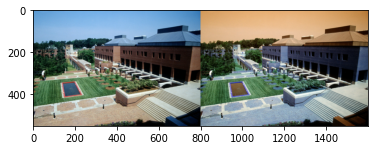

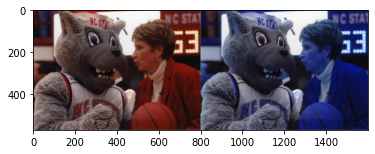

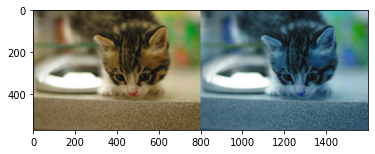

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://placekitten.com/800/571"]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list
for n, url in enumerate(urls):
   plt.figure()
   image = io.imread(url)
   image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
   final_frame = cv.hconcat((image, image_2))
   plt.imshow(final_frame)
   print('\n')
   plt.savefig(f'image_processing/img{n}.png')

In [ ]:
# Using Colab
# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
"https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
"https://placekitten.com/800/571"]
# Read and display the image

In [ ]:
# loop over the image URLs, you could store several image urls in the list
for n, url in enumerate(urls):
 plt.figure()
 image = io.imread(url)
 image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
 final_frame = cv.hconcat((image, image_2))
 # cv2_imshow(final_frame) // uncomment for colab
 print('\n')
 plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

(571, 800, 3)
uint8
571
800
3


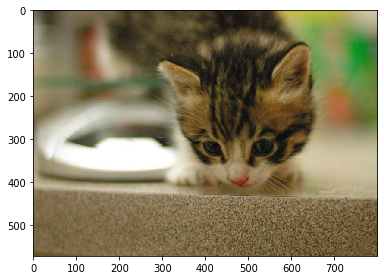

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
io.imshow(image)
print(image.shape)
print(image.dtype)
# Check the height of image
print(image.shape[0])
# Check the width of image
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])
plt.savefig(f'image_processing/img3.png')

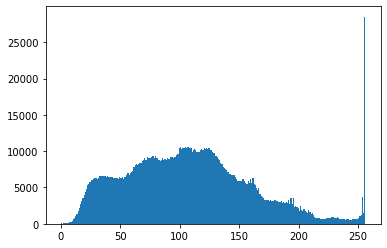

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256])
plt.savefig(f'image_processing/img4.png')

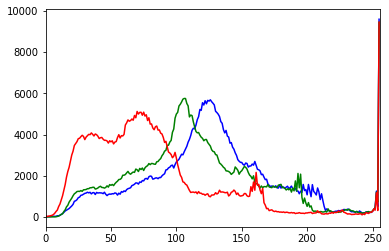

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
 histr = cv.calcHist([image],[i],None,[256],[0,256])
 plt.plot(histr,color = col)
 plt.xlim([0,256])
 plt.savefig(f'image_processing/img5.png')

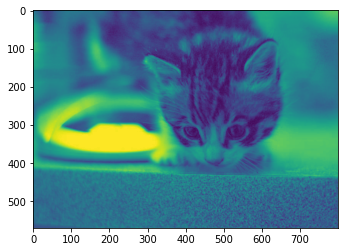

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.savefig(f'image_processing/img6.png')

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image

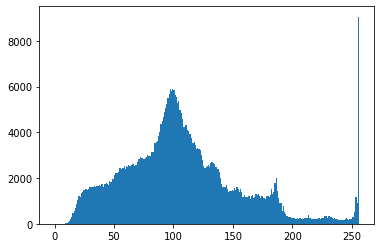

In [ ]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.savefig(f'image_processing/img7.png')

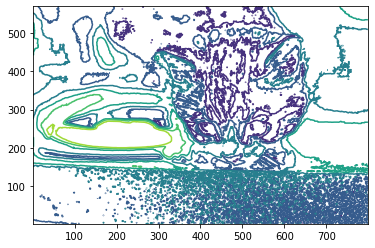

In [ ]:
plt.contour(gray_image, origin = "image")
plt.savefig(f'image_processing/img8.png')


In [ ]:
import numpy as np
from PIL import Image
ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv. CHAIN_APPROX_SIMPLE)
image = cv.drawContours(image, contours, -1, (0, 255, 0), 3)
result = Image.fromarray((image).astype(np.uint8))
result.save('image_processing/img9.png')

In [ ]:
im2 = - gray_image + 255
result = Image.fromarray((im2).astype(np.uint8))
result.save('image_processing/img10.png')

In [ ]:
im3 = gray_image + 50
result = Image.fromarray((im3).astype(np.uint8))
result.save('image_processing/img11.png')


In [ ]:
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image. """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max() #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]
  # apply the function on your dark image to increase the contrast
  # we could observe that the contrast of the black background has increased
  im5 = histeq(im3)
  plt.imshow(im5)
  plt.show()


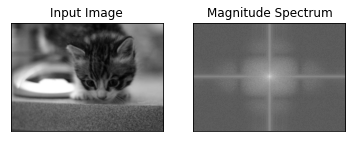

In [ ]:
imBlur = cv.blur(gray_image,(5,5))
f = np.fft.fft2(imBlur)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

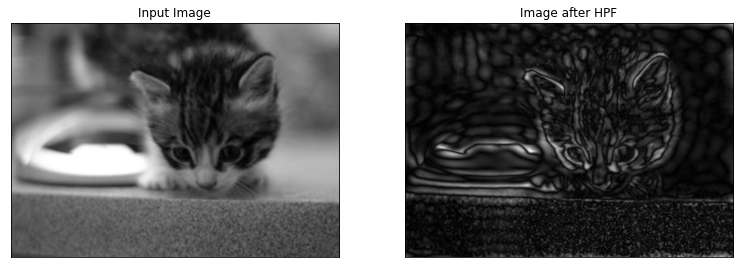

In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()


Text(0.5, 1.0, 'Search pattern in this image')

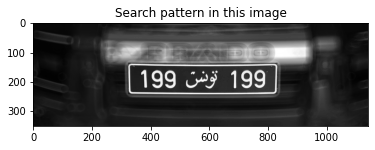

In [ ]:
from skimage import color
from skimage import io
full = color.rgb2gray(io.imread('./image_processing/platine.jpg'))
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Search pattern in this image")

Text(0.5, 1.0, 'Search pattern in this image')

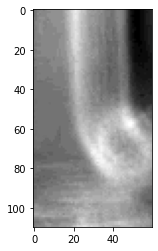

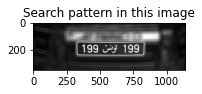

In [ ]:
template = full[240:370,190:250]
plt.imshow(template,cmap = plt.cm.gray)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(full,cmap = plt.cm.gray)
plt.title("Search pattern in this image")

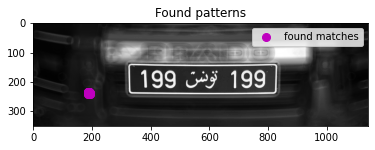

In [ ]:
correlation=match_template(full,template)
xcoords=[]
ycoords=[]
for row in range(correlation.shape[0]):
        for col in range(correlation.shape[1]):
                if correlation[row,col]>0.9:
                      #print(row,col,correlation[row,col])
                      xcoords.append(col)
                      ycoords.append(row)
                      plt.imshow(full,cmap = plt.cm.gray)
plt.title("Found patterns")
plt.plot(xcoords,ycoords,'om',ms=8,label="found matches")
plt.legend(loc=2,numpoints=1)
plt.legend()
plt.show()

(1023, 963, 3)

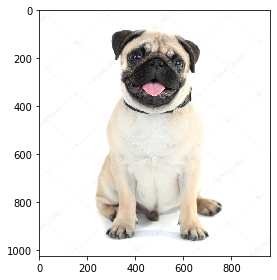

In [ ]:
from skimage import io
image = io.imread("/content/image_processing/Pug.jpg")
io.imshow(image)
image.shape

(array([  13411.,   59500.,   70398.,   44219.,   35925.,   36215.,
          61830.,  120816.,  273319., 2239814.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

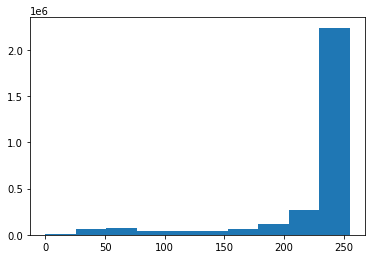

In [ ]:
import matplotlib.pylab as plt
plt.hist(image.flatten())

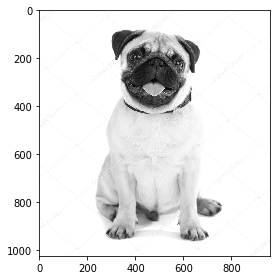

In [ ]:
from skimage import color
imageGray = color.rgb2gray(image)
io.imshow(imageGray)

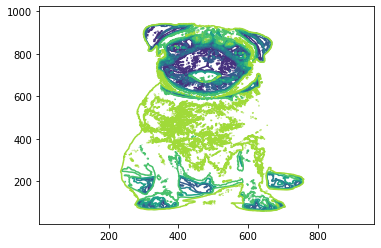

In [ ]:
plt.contour(imageGray, origin = "image") #origin = "image", else inverted

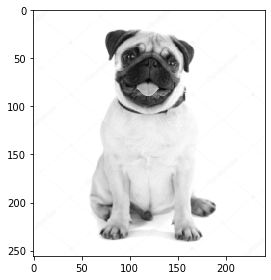

In [ ]:
from skimage.transform import rescale
image_rescaled = rescale(imageGray, 0.25)
io.imshow(image_rescaled)

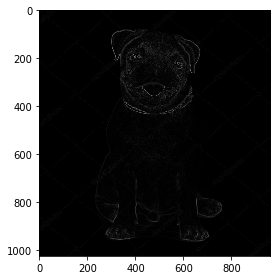

In [ ]:
from skimage import filters
edges = filters.sobel(imageGray)
io.imshow(edges)
io.show()

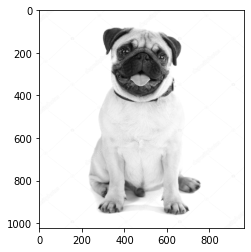

In [ ]:
import numpy as np
f = np.fft.fft2(imageGray)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift))
plt.imshow(imageGray, cmap = "gray")

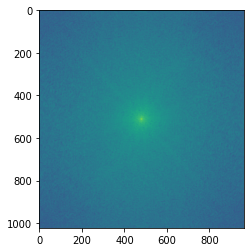

In [ ]:
plt.imshow(magnitude_spectrum)
plt.show()

11490434/11490434 [==============================] - 0s 0us/step
5
(60000, 28, 28)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
after [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


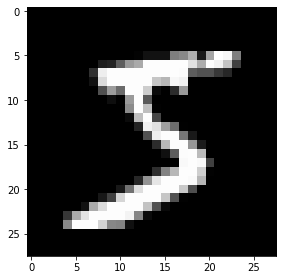

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
from skimage import io
io.imshow(x_train[0])
print(y_train[0])
print(x_train.shape)
print(x_train[0][0])
x_train = x_train.reshape(60000,28,28,1)
print("after", x_train[0][0])
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
print(y_train)
y_train = keras.utils.to_categorical(y_train, 10)
print("after", y_train[0])
y_test = keras.utils.to_categorical(y_test, 10)

[5 0 4 ... 5 6 8]
after [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                        

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=5000, epochs=1)
score = model.evaluate(x_train, y_train)
print(score)
score = model.evaluate(x_test, y_test)
print(score)

1875/1875 [==============================] - 29s 15ms/step - loss: 9.6493 - accuracy: 0.0992
[9.649338722229004, 0.09920000284910202]
313/313 [==============================] - 5s 14ms/step - loss: 9.9423 - accuracy: 0.1023
[9.942255020141602, 0.1023000031709671]
